# Task 3 - Resume / Candidate Screening System

This project is an NLP-based Resume Screening and Candidate Ranking System designed to automate the initial hiring process. The system analyzes resumes, extracts relevant skills, compares them with a given job description, and ranks candidates based on their relevance to the role. It also identifies missing skills to help recruiters make informed decisions.<br>
The goal of this project is to demonstrate how Natural Language Processing and machine learning techniques can be used to build intelligent, decision-support tools for modern recruitment systems.

In [38]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ajaya\Resume  Candidate Screening System\data\Resume.csv")
print(df.head())
print(df.info())

         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null

In [5]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

This is called EDA (Exploratory Data Analysis)

In [10]:
print(df.columns)


Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')


In [13]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)
    
df['Resume_str'] = df['Resume_str'].fillna('')
df['Cleaned_Resume'] = df['Resume_str'].apply(clean_text)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df[['Resume_str', 'Cleaned_Resume']].head()


,Resume_str,Cleaned_Resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,hr administratormarketing associate hr adminis...
1,"HR SPECIALIST, US HR OPERATIONS ...",hr specialist us hr operations summary versati...
2,HR DIRECTOR Summary Over 2...,hr director summary years experience recruitin...
3,HR SPECIALIST Summary Dedica...,hr specialist summary dedicated driven dynamic...
4,HR MANAGER Skill Highlights ...,hr manager skill highlights hr skills hr depar...


In [14]:
job_description = """
We are looking for a Data Scientist with experience in Python,
Machine Learning, SQL, Data Analysis, and Deep Learning.
Knowledge of NLP and TensorFlow is a plus.
"""

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

all_documents = df['Cleaned_Resume'].tolist() + [job_description]

tfidf_matrix = vectorizer.fit_transform(all_documents)


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

job_vector = tfidf_matrix[-1]
resume_vectors = tfidf_matrix[:-1]

scores = cosine_similarity(job_vector, resume_vectors)


In [17]:
job_skills = [
    "python", "machine learning", "sql",
    "data analysis", "deep learning",
    "nlp", "tensorflow"
]


In [18]:
def extract_skills(text, skills):
    text = text.lower()
    found = []
    for skill in skills:
        if skill in text:
            found.append(skill)
    return found

df['Extracted_Skills'] = df['Cleaned_Resume'].apply(lambda x: extract_skills(x, job_skills))


In [19]:
def find_missing(skills_found, required_skills):
    return list(set(required_skills) - set(skills_found))

df['Missing_Skills'] = df['Extracted_Skills'].apply(lambda x: find_missing(x, job_skills))


In [21]:
print(df.columns)


Index(['ID', 'Resume_str', 'Resume_html', 'Category', 'Cleaned_Resume',
       'Extracted_Skills', 'Missing_Skills'],
      dtype='object')


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine resumes + job description
all_documents = df['Cleaned_Resume'].tolist() + [job_description]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_documents)

# Separate job vector and resume vectors
job_vector = tfidf_matrix[-1]
resume_vectors = tfidf_matrix[:-1]

# Calculate similarity
scores = cosine_similarity(job_vector, resume_vectors)

# Add score column
df['Score'] = scores[0]

In [26]:
ranked_df = df.sort_values(by='Score', ascending=False)

ranked_df[['Category', 'Score', 'Extracted_Skills', 'Missing_Skills']].head(5)

,Category,Score,Extracted_Skills,Missing_Skills
1762,ENGINEERING,0.093722,"[python, machine learning, sql, data analysis]","[deep learning, nlp, tensorflow]"
1218,CONSULTANT,0.086198,"[python, machine learning, sql, data analysis]","[deep learning, nlp, tensorflow]"
2153,BANKING,0.082148,"[python, machine learning, sql]","[nlp, deep learning, data analysis, tensorflow]"
926,AGRICULTURE,0.073756,"[python, sql, tensorflow]","[nlp, deep learning, data analysis, machine le..."
2291,ARTS,0.072685,[],"[deep learning, data analysis, tensorflow, pyt..."


The system analyzed each resume and compared it with the job description to determine how closely each candidate matches the required skills. Based on this comparison, candidates were assigned a match score and ranked from highest to lowest relevance.<br>

The Engineering candidate received the highest score because their resume includes key skills such as Python, Machine Learning, SQL, and Data Analysis. However, they are missing advanced skills like Deep Learning, NLP, and TensorFlow. Overall, this candidate shows the strongest alignment with the role.<br>

The Consultant candidate also demonstrates strong technical skills similar to the top candidate but with slightly lower overall alignment, resulting in a slightly lower score.<br>

The Banking candidate has some relevant skills, including Python and SQL, but is missing several important requirements, which lowers their overall match score.<br>

The Agriculture candidate shows limited alignment with the required skill set, as several important technical skills are missing.<br>

The Arts candidate does not demonstrate relevant technical skills for this role and therefore ranks lowest in job relevance.<br>

Overall, the system helps identify which candidates best match the job requirements and clearly highlights missing skills to support better hiring decisions.

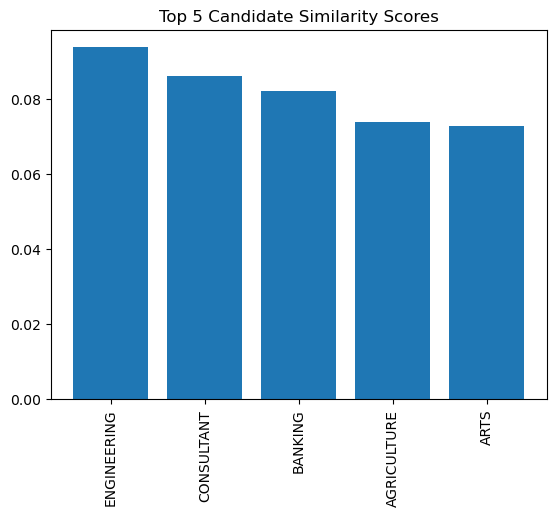

In [35]:
import matplotlib.pyplot as plt

top5 = ranked_df.head(5)

plt.figure()
plt.bar(range(len(top5)), top5['Score'])
plt.xticks(range(len(top5)), top5['Category'], rotation=90)
plt.title("Top 5 Candidate Similarity Scores")
plt.show()

##### Conclusion

In this project, an NLP-based Resume Screening System was developed to automate candidate evaluation and ranking. The system processes unstructured resume text, extracts relevant skills, compares resumes with a job description using similarity scoring, and ranks candidates based on job relevance. It also highlights missing skills to support better hiring decisions.

This project demonstrates how Natural Language Processing and machine learning techniques can be applied to real-world recruitment problems. By reducing manual screening effort and improving consistency in candidate evaluation, such systems can significantly enhance the efficiency of the hiring process.